In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("C:/Users/nbath/OneDrive/Desktop/jupyter/bulding_energy_consumption.csv")


df.head()


,building_id,building_name,building_type,retrofit_status,green_certified,construction_year,energy_star_rating,ownership_type,district,tsa,...,wbt_high,k_high,gsr_high,wsp_high,n,year,rle,rhe,cle,che
0,ElectricRoad_B14714C,Pacific Place,Commercial,Yes,Yes,1962,5,Private,Sham Shui Po,102.590460,...,25.234623,67.268298,422.059221,6.000851,6,1993,6.401584,0.933359,0.243908,0.796179
1,JavaRoad_B64048Y,Crystal Square,Residential,No,No,1998,2,Private,Yau Tsim Mong,91.084651,...,24.509794,68.899658,494.661176,6.271005,18,1992,6.678681,1.209424,0.334033,1.250715
2,JavaRoad_B20612W,Metro Gardens,Commercial,No,Yes,1964,4,Public,Sham Shui Po,105.326116,...,25.135538,69.326652,508.230000,6.049031,13,1985,5.928150,1.052586,0.329475,1.251122
3,CantonRoad_B87300D,Pacific Heights,Commercial,No,No,1990,5,Public,Kowloon City,112.600000,...,24.770237,67.202596,479.724966,5.918851,23,2011,6.135298,1.124367,0.333673,1.086619
4,ConnaughtRoad_B56901H,Luna Court,Residential,No,No,2008,2,Private,Tsuen Wan,89.347141,...,24.920198,68.590966,451.682951,6.275991,6,1990,5.957122,1.089932,0.253656,1.005009


In [7]:
numerical_summary=df.describe()
numerical_summary

,construction_year,energy_star_rating,tsa,gdp,hn,ln,dbt_low,wbt_low,k_low,gsr_low,...,wbt_high,k_high,gsr_high,wsp_high,n,year,rle,rhe,cle,che
count,35469.000000,35469.000000,35469.000000,3.546900e+04,35469.000000,35469.000000,35469.000000,35469.000000,35469.000000,35469.000000,...,35469.000000,35469.000000,35469.000000,35469.000000,35469.000000,35469.000000,35469.000000,35469.000000,35469.000000,35469.000000
mean,1984.977727,3.014181,92.260754,1.230469e+06,1932.704870,3235.257754,19.068476,16.373391,67.160520,325.703705,...,24.688269,69.001625,464.084528,6.131993,17.925061,1998.464321,6.464475,1.098900,0.266399,0.979276
std,20.527907,1.411418,15.603269,6.049903e+05,336.885181,407.043340,0.600378,0.657653,4.124209,25.418415,...,0.337810,2.944141,25.326609,0.390226,10.089680,9.809989,1.327938,0.251704,0.060264,0.227145
min,1950.000000,1.000000,54.710000,1.960050e+05,1311.600000,2498.100000,17.880000,15.050000,58.830000,259.260000,...,24.050000,62.170000,388.500000,5.190000,1.000000,1982.000000,2.375582,0.354595,0.082581,0.329724
25%,1967.000000,2.000000,81.201932,7.770992e+05,1686.631502,2931.826892,18.637238,15.907220,64.251399,308.424607,...,24.445911,66.960834,446.629047,5.860144,9.000000,1990.000000,5.504323,0.918761,0.223125,0.815027
50%,1985.000000,3.000000,93.547538,1.224561e+06,1935.807911,3236.787897,19.069463,16.380460,67.129048,325.613255,...,24.685389,69.035295,464.412577,6.140200,18.000000,1999.000000,6.416435,1.087991,0.263819,0.966523
75%,2003.000000,4.000000,105.840998,1.662211e+06,2188.544746,3544.527177,19.499059,16.851574,69.993662,343.158321,...,24.919362,71.087859,482.617772,6.417564,27.000000,2007.000000,7.382242,1.268987,0.307448,1.131384
max,2020.000000,5.000000,112.600000,2.490703e+06,2498.900000,3920.100000,20.220000,17.590000,78.000000,382.290000,...,25.610000,74.830000,508.230000,6.820000,35.000000,2015.000000,10.947703,2.261662,0.489117,1.828864


In [8]:
missing_values=df.isnull().sum()
missing_values

building_id           0
building_name         0
building_type         0
retrofit_status       0
green_certified       0
construction_year     0
energy_star_rating    0
ownership_type        0
district              0
tsa                   0
gdp                   0
hn                    0
ln                    0
dbt_low               0
wbt_low               0
k_low                 0
gsr_low               0
wsp_low               0
dbt_high              0
wbt_high              0
k_high                0
gsr_high              0
wsp_high              0
n                     0
year                  0
rle                   0
rhe                   0
cle                   0
che                   0
dtype: int64

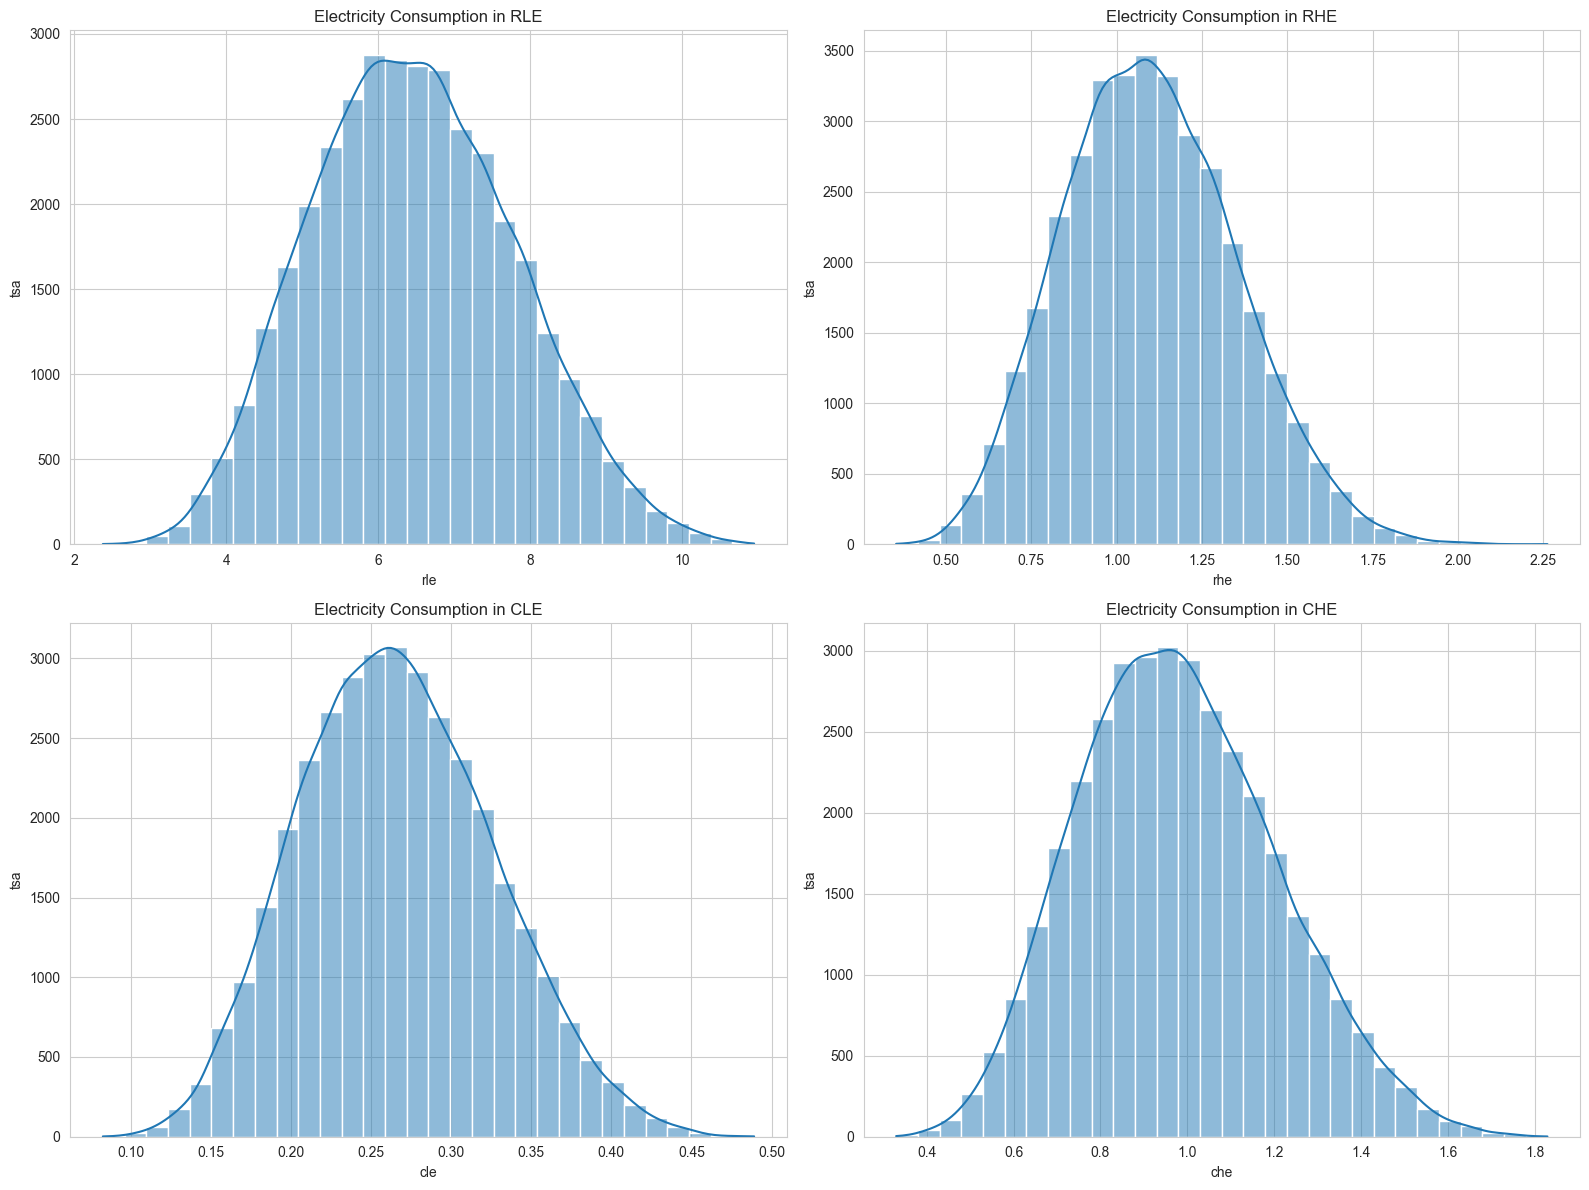

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
fig , ax=plt.subplots(2,2,figsize=(16,12))
sns.histplot(df['rle'],bins=30,kde=True,ax=ax[0,0])
ax[0,0].set_title("Electricity Consumption in RLE")
ax[0,0].set_xlabel('rle')
ax[0,0].set_ylabel('tsa')

sns.histplot(df['rhe'],bins=30,kde=True,ax=ax[0,1])
ax[0,1].set_title("Electricity Consumption in RHE")
ax[0,1].set_xlabel('rhe')
ax[0,1].set_ylabel('tsa')

sns.histplot(df['cle'],bins=30,kde=True,ax=ax[1,0])
ax[1,0].set_title("Electricity Consumption in CLE")
ax[1,0].set_xlabel('cle')
ax[1,0].set_ylabel('tsa')

sns.histplot(df['che'],bins=30,kde=True,ax=ax[1,1])
ax[1,1].set_title("Electricity Consumption in CHE")
ax[1,1].set_xlabel('che')
ax[1,1].set_ylabel('tsa')
plt.tight_layout()
plt.show()

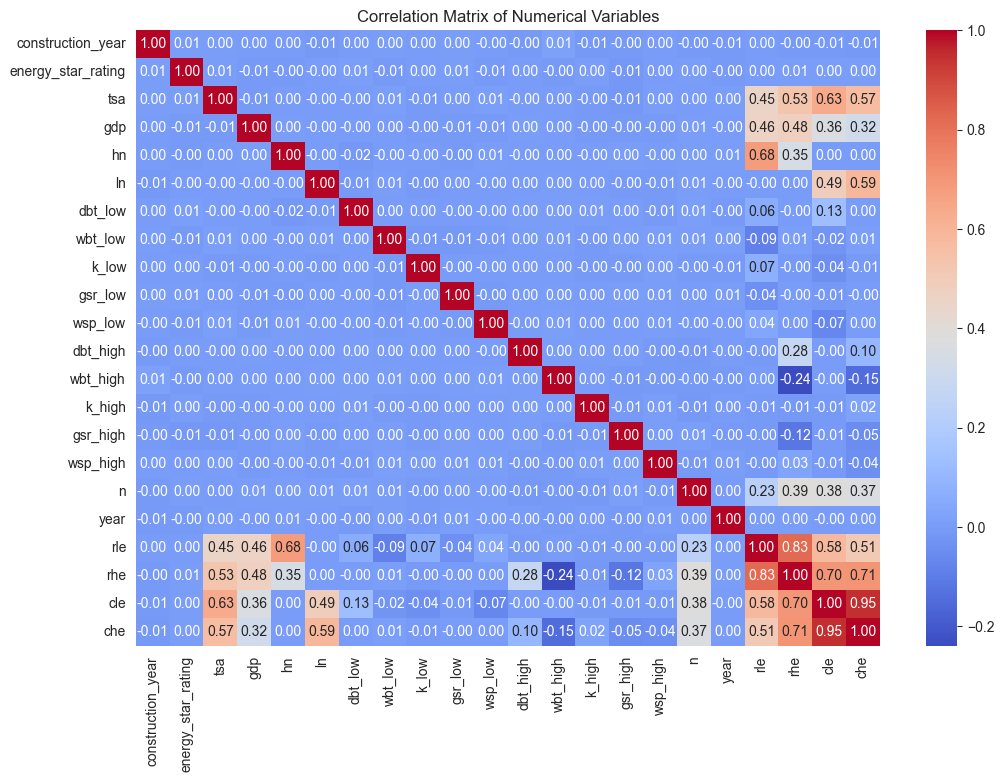

In [15]:
numeric_data=df.select_dtypes(include=[np.number])
correlation_matrix=numeric_data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

In [19]:
data.to_csv('building_energy_dataset_new.csv', index=False)

In [20]:
from sklearn.linear_model import Lasso
# -------------------------
# 5. LASSO MODEL TRAINING (Using log-transformed data)
# -------------------------
# Define feature sets
residential_features = ['tsa', 'gdp', 'hn', 'dbt_low', 'wbt_low', 'k_low', 'gsr_low', 'wsp_low', 'n']
residential_high_features = ['tsa', 'gdp', 'hn', 'dbt_high', 'wbt_high', 'k_high', 'gsr_high', 'wsp_high', 'n']
commercial_features = ['tsa', 'gdp', 'ln', 'dbt_low', 'wbt_low', 'k_low', 'gsr_low', 'wsp_low', 'n']
commercial_high_features = ['tsa', 'gdp', 'ln', 'dbt_high', 'wbt_high', 'k_high', 'gsr_high', 'wsp_high', 'n']

def train_lasso(X, y, alpha=0.0001, max_iter=10000):
    model = Lasso(alpha=alpha, max_iter=max_iter)
    model.fit(X, y)
    preds = model.predict(X)
    mse = mean_squared_error(y, preds)
    r2 = r2_score(y, preds)
    return model, mse, r2

# Prepare log-transformed features and responses for each model
# For residential low-AC (rle)
X_rle = np.log(data[residential_features])
y_rle = np.log(data['rle'])
lasso_rle, mse_rle, r2_rle = train_lasso(X_rle, y_rle)

# For residential high-AC (rhe)
X_rhe = np.log(data[residential_high_features])
y_rhe = np.log(data['rhe'])
lasso_rhe, mse_rhe, r2_rhe = train_lasso(X_rhe, y_rhe)

# For commercial low-AC (cle)
X_cle = np.log(data[commercial_features])
y_cle = np.log(data['cle'])
lasso_cle, mse_cle, r2_cle = train_lasso(X_cle, y_cle)

# For commercial high-AC (che)
X_che = np.log(data[commercial_high_features])
y_che = np.log(data['che'])
lasso_che, mse_che, r2_che = train_lasso(X_che, y_che)

# Build a results table similar to Table 3 in the base paper
results = pd.DataFrame({
    "Electricity consumption": ["tsa", "gdp", "hn", "ln", "dbt", "wbt", "k", "gsr", "wsp", "n", "Constant", "MSE", "R²"],
    "Residential buildings\nLow-AC seasons\n(1) rle\n(α=0)": [
        f"{lasso_rle.coef_[0]:.4f}",
        f"{lasso_rle.coef_[1]:.4f}",
        f"{lasso_rle.coef_[2]:.4f}",
        "",  # no ln term for residential low-AC
        f"{lasso_rle.coef_[3]:.4f}",
        f"{lasso_rle.coef_[4]:.4f}",
        f"{lasso_rle.coef_[5]:.4f}",
        f"{lasso_rle.coef_[6]:.4f}",
        f"{lasso_rle.coef_[7]:.4f}",
        f"{lasso_rle.coef_[8]:.4f}",
        f"{lasso_rle.intercept_:.4f}",
        f"{mse_rle:.4f}",
        f"{r2_rle:.4f}"
    ],
    "Residential buildings\nHigh-AC seasons\n(2) rhe\n(α=0)": [
        f"{lasso_rhe.coef_[0]:.4f}",
        f"{lasso_rhe.coef_[1]:.4f}",
        f"{lasso_rhe.coef_[2]:.4f}",
        "",  # no ln term for residential high-AC
        f"{lasso_rhe.coef_[3]:.4f}",
        f"{lasso_rhe.coef_[4]:.4f}",
        f"{lasso_rhe.coef_[5]:.4f}",
        f"{lasso_rhe.coef_[6]:.4f}",
        f"{lasso_rhe.coef_[7]:.4f}",
        f"{lasso_rhe.coef_[8]:.4f}",
        f"{lasso_rhe.intercept_:.4f}",
        f"{mse_rhe:.4f}",
        f"{r2_rhe:.4f}"
    ],
    "Commercial buildings\nLow-AC seasons\n(3) cle\n(α=0)": [
        f"{lasso_cle.coef_[0]:.4f}",
        f"{lasso_cle.coef_[1]:.4f}",
        "",  # no hn term because we use ln
        f"{lasso_cle.coef_[2]:.4f}",
        f"{lasso_cle.coef_[3]:.4f}",
        f"{lasso_cle.coef_[4]:.4f}",
        f"{lasso_cle.coef_[5]:.4f}",
        f"{lasso_cle.coef_[6]:.4f}",
        f"{lasso_cle.coef_[7]:.4f}",
        f"{lasso_cle.coef_[8]:.4f}",
        f"{lasso_cle.intercept_:.4f}",
        f"{mse_cle:.4f}",
        f"{r2_cle:.4f}"
    ],
    "Commercial buildings\nHigh-AC seasons\n(4) che\n(α=0)": [
        f"{lasso_che.coef_[0]:.4f}",
        f"{lasso_che.coef_[1]:.4f}",
        "",  # no hn term because we use ln
        f"{lasso_che.coef_[2]:.4f}",
        f"{lasso_che.coef_[3]:.4f}",
        f"{lasso_che.coef_[4]:.4f}",
        f"{lasso_che.coef_[5]:.4f}",
        f"{lasso_che.coef_[6]:.4f}",
        f"{lasso_che.coef_[7]:.4f}",
        f"{lasso_che.coef_[8]:.4f}",
        f"{lasso_che.intercept_:.4f}",
        f"{mse_che:.4f}",
        f"{r2_che:.4f}"
    ]
})

print("\n----- LASSO REGRESSION RESULTS (Similar to Table 3 in the Base Paper) -----")
print(results.to_string(index=False))


----- LASSO REGRESSION RESULTS (Similar to Table 3 in the Base Paper) -----
Electricity consumption Residential buildings\nLow-AC seasons\n(1) rle\n(α=0) Residential buildings\nHigh-AC seasons\n(2) rhe\n(α=0) Commercial buildings\nLow-AC seasons\n(3) cle\n(α=0) Commercial buildings\nHigh-AC seasons\n(4) che\n(α=0)
                    tsa                                                0.5288                                                 0.7036                                               0.8389                                                0.7671
                    gdp                                                0.1590                                                 0.1854                                               0.1380                                                0.1239
                     hn                                                0.7932                                                 0.4450                                                                       